In [1]:
# 이 예제에 필요한 DeepMIMO 및 기타 라이브러리 가져오기 
!pip install DeepMIMOv3
import  DeepMIMOv3
import  numpy  as  np 
from  pprint  import  pprint 
import  matplotlib.pyplot  as  plt

plt . rcParams [ 'figure.figsize' ]  =  [ 12 ,  8 ]  # 기본 플롯 크기 설정

In [2]:
## Load and print the default parameters
parameters = DeepMIMOv3.default_params()
pprint(parameters)

{'OFDM': {'RX_filter': 0,
          'bandwidth': 0.05,
          'selected_subcarriers': array([0]),
          'subcarriers': 512},
 'OFDM_channels': 1,
 'active_BS': array([1]),
 'bs_antenna': {'FoV': array([360, 180]),
                'radiation_pattern': 'isotropic',
                'rotation': array([0, 0, 0]),
                'shape': array([8, 4]),
                'spacing': 0.5},
 'dataset_folder': './Raytracing_scenarios',
 'dynamic_scenario_scenes': array([1]),
 'enable_BS2BS': 1,
 'enable_doppler': 0,
 'enable_dual_polar': 0,
 'num_paths': 5,
 'scenario': 'O1_60',
 'ue_antenna': {'FoV': array([360, 180]),
                'radiation_pattern': 'isotropic',
                'rotation': array([0, 0, 0]),
                'shape': array([4, 2]),
                'spacing': 0.5},
 'user_rows': array([1]),
 'user_subsampling': 1}


## dynamic scenarios

In [11]:
## Change parameters for the setup
# Scenario O1_60 extracted at the dataset_folder
#LWM 동적 시나리오 불러오기
#자신의 LWM 파일 위치 경로 작성
parameters['dataset_folder'] = r'C:\Users\dlghd\졸업프로젝트\LWM'
# scnario = 02_dyn_3p5 <- 다운받은 파일(동적시나리오)
parameters['scenario'] = 'O2_dyn_3p5'
parameters['dynamic_scenario_scenes'] = np.arange(5) #scene 0~4

parameters['num_paths'] = 10

# User rows 1-100
parameters['user_row_first'] = 1
parameters['user_row_last'] = 100

# Activate only the first basestation
parameters['active_BS'] = np.array([1]) 

parameters['OFDM']['bandwidth'] = 0.05 # 50 MHz
parameters['OFDM']['subcarriers'] = 512 # OFDM with 512 subcarriers
parameters['OFDM']['subcarriers_limit'] = 64 # Keep only first 64 subcarriers

parameters['ue_antenna']['shape'] = np.array([1, 1, 1]) # Single antenna
parameters['bs_antenna']['shape'] = np.array([1, 32, 1]) # ULA of 32 elements
#parameters['bs_antenna']['rotation'] = np.array([0, 30, 90]) # ULA of 32 elements
#parameters['ue_antenna']['rotation'] = np.array([[0, 30], [30, 60], [60, 90]]) # ULA of 32 elements
#parameters['ue_antenna']['radiation_pattern'] = 'isotropic' 
#parameters['bs_antenna']['radiation_pattern'] = 'halfwave-dipole' 

In [12]:
## Generate and inspect the dataset
dataset = DeepMIMOv3.generate_data(parameters)

The following parameters seem unnecessary:
{'user_row_first', 'scene', 'subcarriers_limit', 'user_row_last'}

Scene 1/5

Basestation 1

UE-BS Channels


Generating channels: 100%|███████████████████████████████████████████████████████| 1891/1891 [00:00<00:00, 3605.99it/s]



BS-BS Channels


Generating channels: 100%|██████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 497.31it/s]



Scene 2/5

Basestation 1

UE-BS Channels


Generating channels: 100%|███████████████████████████████████████████████████████| 1891/1891 [00:00<00:00, 3830.63it/s]



BS-BS Channels


Generating channels: 100%|██████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 490.68it/s]



Scene 3/5

Basestation 1

UE-BS Channels


Generating channels: 100%|███████████████████████████████████████████████████████| 1891/1891 [00:00<00:00, 3822.35it/s]



BS-BS Channels


Generating channels: 100%|██████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 495.60it/s]



Scene 4/5

Basestation 1

UE-BS Channels


Generating channels: 100%|███████████████████████████████████████████████████████| 1891/1891 [00:00<00:00, 3861.36it/s]



BS-BS Channels


Generating channels: 100%|██████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 499.80it/s]



Scene 5/5

Basestation 1

UE-BS Channels


Generating channels: 100%|███████████████████████████████████████████████████████| 1891/1891 [00:00<00:00, 3780.15it/s]



BS-BS Channels


Generating channels: 100%|██████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 990.62it/s]


In [15]:
len(dataset)

5

In [19]:
dataset[0]

[{'user': {'paths': array([{'num_paths': 0, 'DoD_phi': [], 'DoD_theta': [], 'DoA_phi': [], 'DoA_theta': [], 'phase': [], 'ToA': [], 'power': [], 'LoS': []},
          {'num_paths': 0, 'DoD_phi': [], 'DoD_theta': [], 'DoA_phi': [], 'DoA_theta': [], 'phase': [], 'ToA': [], 'power': [], 'LoS': []},
          {'num_paths': 0, 'DoD_phi': [], 'DoD_theta': [], 'DoA_phi': [], 'DoA_theta': [], 'phase': [], 'ToA': [], 'power': [], 'LoS': []},
          ...,
          {'num_paths': 1, 'DoD_phi': array([-4.67836], dtype=float32), 'DoD_theta': array([90.9207], dtype=float32), 'DoA_phi': array([175.322], dtype=float32), 'DoA_theta': array([89.0793], dtype=float32), 'phase': array([3.80264], dtype=float32), 'ToA': array([1.03828e-06], dtype=float32), 'LoS': array([0.], dtype=float32), 'power': array([4.792699e-10], dtype=float32)},
          {'num_paths': 1, 'DoD_phi': array([-4.67536], dtype=float32), 'DoD_theta': array([90.9201], dtype=float32), 'DoA_phi': array([175.325], dtype=float32), 'DoA_thet

In [29]:
type(dataset[0])

list

In [30]:
print(dataset[0])

[{'user': {'paths': array([{'num_paths': 0, 'DoD_phi': [], 'DoD_theta': [], 'DoA_phi': [], 'DoA_theta': [], 'phase': [], 'ToA': [], 'power': [], 'LoS': []},
       {'num_paths': 0, 'DoD_phi': [], 'DoD_theta': [], 'DoA_phi': [], 'DoA_theta': [], 'phase': [], 'ToA': [], 'power': [], 'LoS': []},
       {'num_paths': 0, 'DoD_phi': [], 'DoD_theta': [], 'DoA_phi': [], 'DoA_theta': [], 'phase': [], 'ToA': [], 'power': [], 'LoS': []},
       ...,
       {'num_paths': 1, 'DoD_phi': array([-4.67836], dtype=float32), 'DoD_theta': array([90.9207], dtype=float32), 'DoA_phi': array([175.322], dtype=float32), 'DoA_theta': array([89.0793], dtype=float32), 'phase': array([3.80264], dtype=float32), 'ToA': array([1.03828e-06], dtype=float32), 'LoS': array([0.], dtype=float32), 'power': array([4.792699e-10], dtype=float32)},
       {'num_paths': 1, 'DoD_phi': array([-4.67536], dtype=float32), 'DoD_theta': array([90.9201], dtype=float32), 'DoA_phi': array([175.325], dtype=float32), 'DoA_theta': array([89.0

## 사용자 데이터 접근

In [32]:
user_data = dataset[0][0]['user']
print(user_data.keys())


dict_keys(['paths', 'LoS', 'location', 'distance', 'pathloss', 'channel'])


## 사용자 채널 정보 확인

In [33]:
channel = dataset[0][0]['user']['channel']
print(channel.shape)  # (user, BS antennas, subcarriers, ... 등)


(1891, 1, 32, 1)


## 사용자 위치 정보

In [35]:
location = dataset[0][0]['user']['location']
print(location.shape)      # (사용자 수, 3)
print(location[0:4])         # 첫 번째 사용자의 (x, y, z)


(1891, 3)
[[-91.03330231 -15.37629986   1.        ]
 [-90.83329773 -15.37629986   1.        ]
 [-90.63330078 -15.37629986   1.        ]
 [-90.4332962  -15.37629986   1.        ]]


## 경로 정보

In [44]:
paths = dataset[0][0]['user']['paths']
#사용자 수
print(len(paths))
# 첫 번째 사용자 경로 정보
print(paths[0])

1891
{'num_paths': 0, 'DoD_phi': [], 'DoD_theta': [], 'DoA_phi': [], 'DoA_theta': [], 'phase': [], 'ToA': [], 'power': [], 'LoS': []}


## 기지국 정보

In [40]:
bs_data = dataset[0][0]['basestation']
print(bs_data.keys())


dict_keys(['paths', 'LoS', 'location', 'distance', 'pathloss', 'channel'])


## scene 및 사용자 수

In [45]:
for i, scene in enumerate(dataset[0]):
    user_locs = scene['user']['location']
    print(f"Scene {i}: {len(user_locs)} users")


Scene 0: 1891 users


## 채널 수

In [47]:
len(dataset[0][0]['user']['channel'])

1891

In [50]:
print(dataset[0][0]['user']['paths'][0])

{'num_paths': 0, 'DoD_phi': [], 'DoD_theta': [], 'DoA_phi': [], 'DoA_theta': [], 'phase': [], 'ToA': [], 'power': [], 'LoS': []}


In [56]:
scene = dataset[0][0] # scene 0
ue_idx = 0 # 첫 번째 사용자
channel = scene['user']['channel'][ue_idx]
print(channel.shape)

(1, 32, 1)


❌ Cannot visualize. Channel magnitude shape is (32,) (expected 2D).


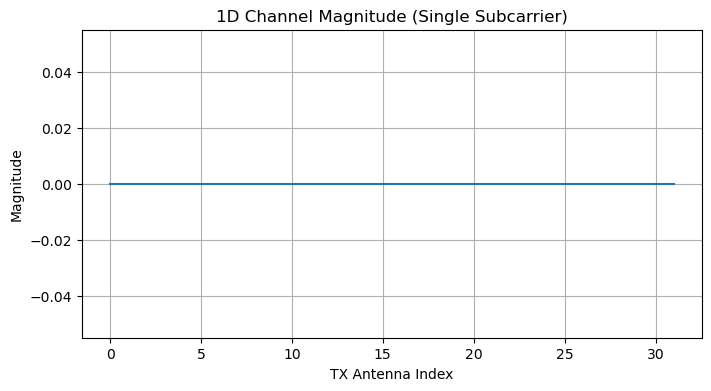

In [57]:
channel_mag = np.abs(np.squeeze(channel))

# 시각화
if channel_mag.ndim == 2:
    plt.figure(figsize=(8, 6))
    plt.imshow(channel_mag.T, aspect='auto', cmap='viridis')
    plt.title('Channel Magnitude Response')
    plt.xlabel('Subcarriers')
    plt.ylabel('TX Antennas')
    plt.colorbar(label='Magnitude')
    plt.show()
else:
    print(f"❌ Cannot visualize. Channel magnitude shape is {channel_mag.shape} (expected 2D).")
    # 예: 서브캐리어 1개인 경우 → 1D plot
    if channel_mag.ndim == 1:
        plt.figure(figsize=(8, 4))
        plt.plot(channel_mag)
        plt.title('1D Channel Magnitude (Single Subcarrier)')
        plt.xlabel('TX Antenna Index')
        plt.ylabel('Magnitude')
        plt.grid(True)
        plt.show()